# **A07 - Arboles de Regresion**
# **Miguel Aaron Castillon Ochoa**

## **Carga del Dataset**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

data = pd.read_csv('Advertising.csv')
data.info()

# Definir características (X) y objetivo (y)
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## **Modelos con el Dataset Completo (Benchmark)**

### **1. Regresion Lineal (Benchmark)**
Entrenamos el modelo de Regresion Lineal con todo el dataset y calculamos el $R^2$

In [5]:
lin_reg_full = LinearRegression()
lin_reg_full.fit(X, y)
y_pred_lin_full = lin_reg_full.predict(X)
r2_lin_full = r2_score(y, y_pred_lin_full)

print(f"R2 (Regresión Lineal, Full Dataset): {r2_lin_full:.4f}")

R2 (Regresión Lineal, Full Dataset): 0.8972


### **2. Arbol de Decision**
Entrenamos el Arbol de Decision con todo el dataset y calculamos el $R^2$

Usaremos un `max_depth` bajo para evitar sobreajuste excesivo.
Un DecisionTreeRegressor sin restricciones tiende a un R2 de 1.0 con todo el dataset, por lo que es vital comparar la diferencia

In [6]:
dt_reg_full = DecisionTreeRegressor(random_state=42)
dt_reg_full.fit(X, y)
y_pred_dt_full = dt_reg_full.predict(X)
r2_dt_full = r2_score(y, y_pred_dt_full)

print(f"R2 (Árbol de Decisión, Full Dataset): {r2_dt_full:.4f}")

R2 (Árbol de Decisión, Full Dataset): 1.0000


### **3. Visualizacion y comparaciones**
Crearemos un Dataframe para facilitarnos la visualizacion


--- Tabla de Comparación de R2 (Full Dataset) ---
           Modelo  R2 Score
 Regresión Lineal  0.897211
Árbol de Decisión  1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4600\253879572.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R2 Score', data=r2_results, palette='viridis')


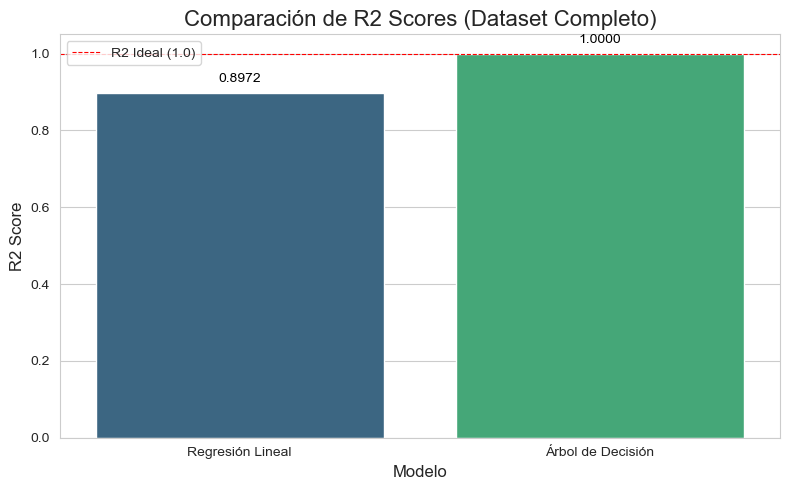

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

r2_results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión'],
    'R2 Score': [r2_lin_full, r2_dt_full]
})

print("\n--- Tabla de Comparación de R2 (Full Dataset) ---")
print(r2_results.to_string(index=False))

# Configurar el estilo de seaborn 
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='R2 Score', data=r2_results, palette='viridis')
plt.title('Comparación de R2 Scores (Dataset Completo)', fontsize=16)
plt.ylabel('R2 Score', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.ylim(0, 1.05) # Asegura que el eje y vaya de 0 a un poco más de 1
plt.axhline(1.0, color='red', linestyle='--', linewidth=0.8, label='R2 Ideal (1.0)') # Línea para R2 = 1.0

# Añadir los valores R2 en las barras
for index, row in r2_results.iterrows():
    plt.text(index, row['R2 Score'] + 0.02, f"{row['R2 Score']:.4f}",
             color='black', ha="center", va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

**Observaciones de los Resultados**

La Regresión Lineal obtiene un R2 de 0.8972, lo cual indica que explica aproximadamente el 89.72% de la varianza en las ventas.
El Árbol de Decisión obtiene un R2 de 1.0000, un valor perfecto (1.0).
Esta diferencia dramática, especialmente el 1.0 del Árbol de Decisión, es una señal clara de **sobreajuste (overfitting)** cuando se entrena con el dataset completo.
El Árbol de Decisión ha memorizado cada punto de dato, creando reglas tan específicas que se ajusta perfectamente a los datos vistos, pero es muy probable que no generalice bien a datos nuevos o no vistos.

## **Modelos con Train-Test Split**

La division de datos es crucial para evaluar el rendimiento real en datos no vistos y detectar el sobreajuste

### **4. Division Train-Test (random_state=42)**
Dividiremos los datos usando 80/20

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### **4a. Regresion Lineal con Split**

In [12]:
lin_reg_split = LinearRegression()
lin_reg_split.fit(X_train, y_train)

# R2 en entrenamiento
r2_lin_train = lin_reg_split.score(X_train, y_train)
# R2 en prueba (TEST)
r2_lin_test = lin_reg_split.score(X_test, y_test)

print(f"R2 (Regresión Lineal, TRAIN): {r2_lin_train:.4f}")
print(f"R2 (Regresión Lineal, TEST): {r2_lin_test:.4f}")

R2 (Regresión Lineal, TRAIN): 0.8957
R2 (Regresión Lineal, TEST): 0.8994


#### **4b. Arbol de Decision con Split**

In [13]:
dt_reg_split = DecisionTreeRegressor(random_state=42)
dt_reg_split.fit(X_train, y_train)

# R2 en entrenamiento
r2_dt_train = dt_reg_split.score(X_train, y_train)
# R2 en prueba (TEST)
r2_dt_test = dt_reg_split.score(X_test, y_test)

print(f"R2 (Árbol de Decisión, TRAIN): {r2_dt_train:.4f}")
print(f"R2 (Árbol de Decisión, TEST): {r2_dt_test:.4f}")

R2 (Árbol de Decisión, TRAIN): 1.0000
R2 (Árbol de Decisión, TEST): 0.9311


#### **4c. Visualizacion y comparacion de los resultados**

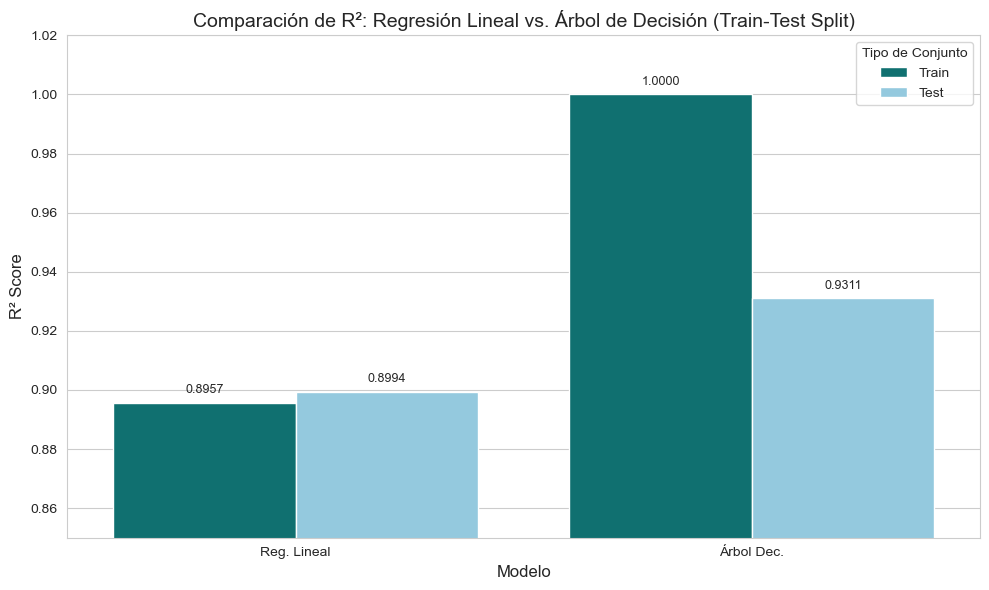

In [14]:
# 1. Definir los resultados del Paso 4 
results = {
    'Modelo': ['Reg. Lineal', 'Reg. Lineal', 'Árbol Dec.', 'Árbol Dec.'],
    'Tipo R2': ['Train', 'Test', 'Train', 'Test'],
    'R2 Score': [0.8957, 0.8994, 1.0000, 0.9311]
}
r2_df = pd.DataFrame(results)

# 2. Preparar el gráfico de barras agrupadas 
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras agrupadas
bar_plot = sns.barplot(x='Modelo', y='R2 Score', hue='Tipo R2', data=r2_df, palette=['teal', 'skyblue'])

plt.title('Comparación de R²: Regresión Lineal vs. Árbol de Decisión (Train-Test Split)', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.ylim(0.85, 1.02) 

# Añadir los valores de R² en las barras
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.4f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      fontsize=9)

plt.legend(title='Tipo de Conjunto')
plt.tight_layout()
plt.show()

**Comparaciones con Train-Test Split** 

**Analisis de Generalizacion**
**1. Regresion Lineal**
- Los $R^2$ de Train (0.8957) y Test (0.8994) son casi idénticos.

- Esto indica que el modelo es estable y posee una alta capacidad de generalización (baja varianza). El conocimiento adquirido en el entrenamiento se aplica consistentemente a los datos no vistos. La Regresión Lineal no es lo suficientemente compleja para sobreajustar estos datos.

**2. Arbol de Decision**
- La métrica de entrenamiento (1.0000) y la de prueba (0.9311) muestran una gran brecha.

- Esta caída de $R^2$ en el conjunto de prueba es la confirmación del sobreajuste. Aunque el $R^2$ de prueba (0.9311) es superior al de la Regresión Lineal, la disparidad sugiere que este rendimiento es frágil. El modelo memorizó detalles específicos del ruido del entrenamiento (dando 1.0000) que no se replicaron en el conjunto de prueba, lo que resulta en un rendimiento inferior al esperado. Para que el Árbol de Decisión fuera una herramienta robusta, requeriría regularización.

**Conclusion:** El uso de un conjunto de prueba demostró ser indispensable para identificar la debilidad de un modelo no regulado (Árbol de Decisión) y para confirmar la fiabilidad y estabilidad de un modelo simple (Regresión Lineal).

## **Con Caracteristicas Polinomicas (Degree=2)**
En esta parte introduciremos ingenieria de caracteristicas para ver si se mejora el rendimiento, especialmente para el modelo lineal, al capturar interacciones entre variables

### **5. Transformacion Polinomica**
Aplicamos `PolynomialFeatures(degree=2)` a los datos separados en train y test.

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)

# Aplicar a los datos originales
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(poly.get_feature_names_out(X.columns))

['TV' 'radio' 'newspaper' 'TV^2' 'TV radio' 'TV newspaper' 'radio^2'
 'radio newspaper' 'newspaper^2']


#### **5a. Regresion Lineal con Polinomiales**

In [16]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

r2_lin_poly_train = lin_reg_poly.score(X_train_poly, y_train)
r2_lin_poly_test = lin_reg_poly.score(X_test_poly, y_test)

print(f"R2 (Regresión Lineal Polinomial, TRAIN): {r2_lin_poly_train:.4f}")
print(f"R2 (Regresión Lineal Polinomial, TEST): {r2_lin_poly_test:.4f}")

R2 (Regresión Lineal Polinomial, TRAIN): 0.9861
R2 (Regresión Lineal Polinomial, TEST): 0.9869


#### **5b. Arbol de Decision con Polinomiales**

In [17]:
dt_reg_poly = DecisionTreeRegressor(random_state=42)
dt_reg_poly.fit(X_train_poly, y_train)

r2_dt_poly_train = dt_reg_poly.score(X_train_poly, y_train)
r2_dt_poly_test = dt_reg_poly.score(X_test_poly, y_test)

print(f"R2 (Árbol de Decisión Polinomial, TRAIN): {r2_dt_poly_train:.4f}")
print(f"R2 (Árbol de Decisión Polinomial, TEST): {r2_dt_poly_test:.4f}")

R2 (Árbol de Decisión Polinomial, TRAIN): 1.0000
R2 (Árbol de Decisión Polinomial, TEST): 0.9486


#### **5c. Visualizacion y comparacion de resultados**

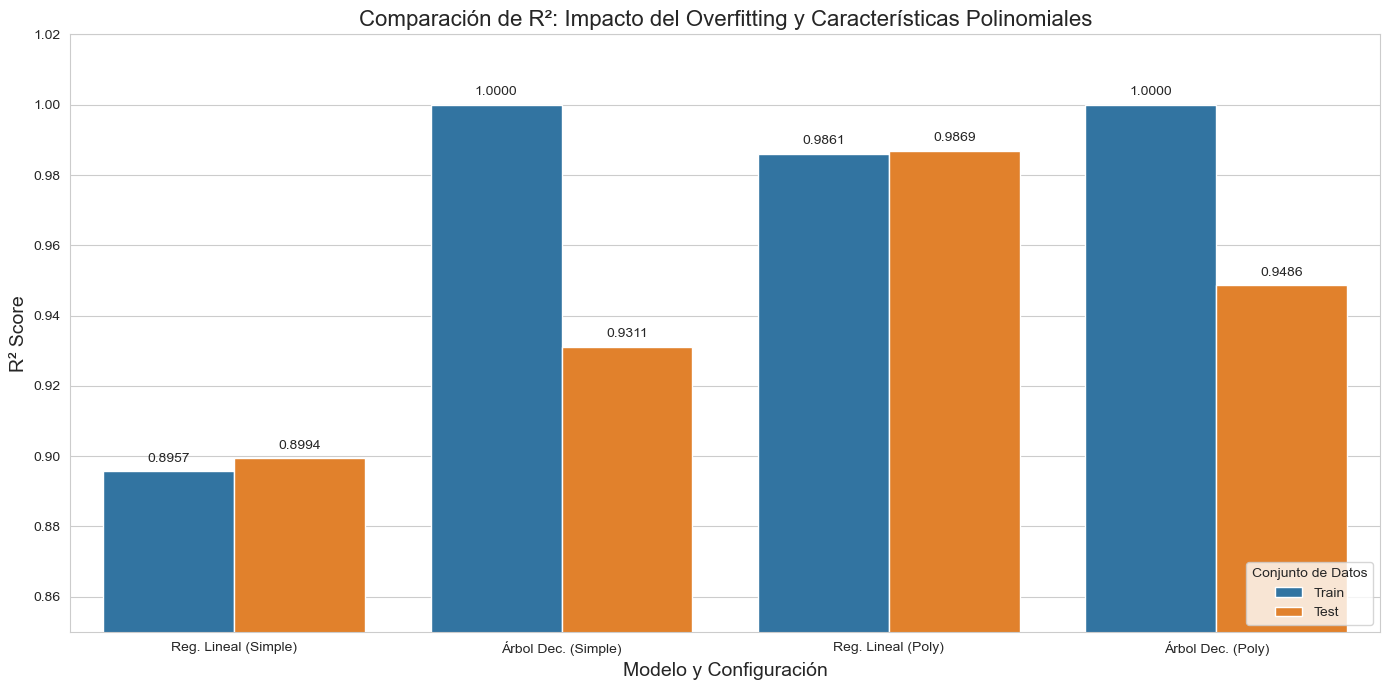

In [18]:
results = {
    # Resultados del Paso 4 (Simple)
    'Modelo': ['Reg. Lineal (Simple)', 'Reg. Lineal (Simple)', 'Árbol Dec. (Simple)', 'Árbol Dec. (Simple)',
               # Resultados del Paso 5 (Polinomial)
               'Reg. Lineal (Poly)', 'Reg. Lineal (Poly)', 'Árbol Dec. (Poly)', 'Árbol Dec. (Poly)'],
    
    'Tipo R2': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    
    'R2 Score': [
        # Paso 4: Simple
        0.8957, 0.8994,  # Reg. Lineal Simple
        1.0000, 0.9311,  # Árbol Dec. Simple
        # Paso 5: Polinomial
        0.9861, 0.9869,  # Reg. Lineal Polinomial
        1.0000, 0.9486   # Árbol Dec. Polinomial
    ]
}
r2_df = pd.DataFrame(results)

# Preparar y Mostrar el Gráfico de Barras Agrupadas 
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Crear el gráfico de barras agrupadas
bar_plot = sns.barplot(x='Modelo', y='R2 Score', hue='Tipo R2', data=r2_df, 
                       palette=['#1f77b4', '#ff7f0e'])

plt.title('Comparación de R²: Impacto del Overfitting y Características Polinomiales', fontsize=16)
plt.ylabel('R² Score', fontsize=14)
plt.xlabel('Modelo y Configuración', fontsize=14)
plt.ylim(0.85, 1.02) 

# Añadir los valores de R² en las barras para claridad
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.4f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      fontsize=10)

plt.legend(title='Conjunto de Datos', loc='lower right')
plt.tight_layout()
plt.show()

#### **Observaciones**

**1. Regresión Lineal Polinomial**

- **Rendimiento:** El $R^2$ de prueba aumentó drásticamente de ≈0.8994 (modelo lineal simple del Paso 4) a 0.9869.

- **Generalización:** Los $R^2$ de Train (0.9861) y Test (0.9869) son casi idénticos.

- **Conclusión:** La adición de características polinomiales (interacciones como TV×Radio y términos cuadráticos) permitió que el modelo Regresión Lineal capturara la naturaleza no lineal de la relación entre la inversión publicitaria y las ventas. El modelo Polinomial ahora explica casi el 99% de la varianza en los datos de prueba, manteniendo su excelente capacidad de generalización y estabilidad (baja varianza).

**2. Árbol de Decisión Polinomial**

- **Rendimiento:** El $R^2$ de prueba mejoró levemente de ≈0.9311 a 0.9486.

- **Generalización y Overfitting:** El $R^2$ de entrenamiento sigue siendo perfecto (1.0000), mientras que el $R^2$ de prueba es 0.9486. La brecha de sobreajuste (overfitting) persiste, aunque el rendimiento en prueba mejoró ligeramente.

- **Conclusión:** El Árbol de Decisión es menos sensible a la ingeniería de características Polinomiales porque ya es capaz de crear divisiones complejas y no lineales por sí mismo. La pequeña mejora podría deberse a que las características polinomiales crearon dimensiones ligeramente más separables. Sin embargo, el problema de fondo —su tendencia a sobreajustar y memorizar el conjunto de entrenamiento— no se resolvió.

## **Conclusiones generales**

El modelo de Regresión Lineal Polinomial de Grado 2 es el claro ganador en términos de equilibrio entre precisión y estabilidad (generalización).

- Superó el rendimiento de prueba del Árbol de Decisión Polinomial (0.9869 vs 0.9486).

- Logró una alta precisión (cercana al Árbol de Decisión) sin caer en el sobreajuste (brecha $R^2$ Train/Test mínima).